Decision trees are a supervised, probabilistic, machine learning classifier that are often used as decision support tools. Like any other classifier, they are capable of predicting the label of a sample, and the way they do this is by examining the probabilistic outcomes of your samples' features.   

Decision trees are one of the oldest and most used machine learning algorithms, perhaps even pre-dating machine learning. They're very popular and have been around for decades. Following through with sequential cause-and-effect decisions comes very naturally.  
Decision trees are a good tool to use when you want backing evidence to support a decision.

We train the [UCI's wheat-seeds dataset](https://archive.ics.uci.edu/ml/datasets/seeds) with decision trees and see the decision boundary plots produced by it.  
You can find the dataset in the above link or in this Github dataset folder.  

You can refer [to the related "Decision Trees" article](https://mashimo.wordpress.com/2020/01/05/decision-trees/) for more details about the method.

# Wheat Seed prediction

## Read the data

In [1]:
import pandas as pd

In [2]:
# 
# Load up the wheat dataset into dataframe 'df'
#
df = pd.read_csv("../datasets/wheat.data", index_col='id')

In [3]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


## Pre-processing the data

What we want to do is to predict the wheat type based on the wheat seed characteristics.  
To simplify the boundary plot, we consider only two of the characteristics.

In [4]:
# we keep groove and perimeter, plus of course the target: wheat type
wheatSimpler = df.drop(columns = ['compactness', 'width', 'length', 'area', 'asymmetry'])

In [5]:
wheatSimpler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 3 columns):
perimeter     210 non-null float64
groove        206 non-null float64
wheat_type    210 non-null object
dtypes: float64(2), object(1)
memory usage: 6.6+ KB


In [6]:
# An easy way to show which rows have nans in them

print (wheatSimpler[pd.isnull(wheatSimpler).any(axis=1)])

     perimeter  groove wheat_type
id                               
7        14.10     NaN   canadian
60       12.86     NaN   canadian
135      14.66     NaN   canadian
201      13.32     NaN   canadian


In [7]:
# 
# Only a few rows. Go ahead and drop any row with a nan
#
wheatSimpler.dropna(axis=0, inplace=True)

# 
# INFO: In the future, you might try setting the nan values to the
# mean value of that column, groove; the mean should only be calculated for
# the specific class rather than across all classes, in this case for canadian type

In [8]:
#
# Copy the labels out of the dataframe into variable 'labels' , then remove
# them from the dataframe. Encode the labels:
# canadian:0, kama:1, and rosa:2
#
labels = wheatSimpler.wheat_type.copy() # copy “y” values out
wheatSimpler.drop(['wheat_type'], axis=1, inplace=True) # drop output column 

labels = labels.map({'canadian':0, 'kama':1, 'rosa':2}) # encoding


## Split dataset into training and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(wheatSimpler, labels, test_size=0.3, 
                                                    random_state=7)


## Train the tree model

In [11]:
#
# We use the SkLearn module tree
#
from sklearn import tree

In [12]:
#
# note that I force the tree depth to a maximum of two (for simplification)
#

model = tree.DecisionTreeClassifier(max_depth=2, random_state=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

Let's plot the tree using the sklearn.tree internal feature, which gives an idea of how the features are considered in the model 

[Text(167.4, 181.2, 'groove <= 5.576\nentropy = 0.666\nsamples = 144\nvalue = [51, 47, 46]'),
 Text(83.7, 108.72, 'perimeter <= 13.54\nentropy = 0.51\nsamples = 96\nvalue = [49, 46, 1]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.045\nsamples = 43\nvalue = [42, 1, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.261\nsamples = 53\nvalue = [7, 45, 1]'),
 Text(251.10000000000002, 108.72, 'perimeter <= 13.95\nentropy = 0.119\nsamples = 48\nvalue = [2, 1, 45]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.082\nsamples = 47\nvalue = [1, 1, 45]')]

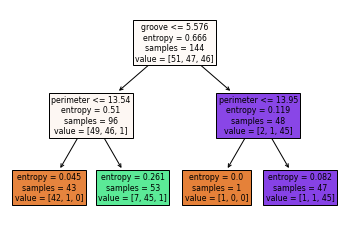

In [13]:
tree.plot_tree(model, feature_names=X_train.columns, filled=True)

As you can see the tree consists of a series of splitting rules, starting at the top of the tree with a question (answer is Yes on the left and No on the right) and goes on with "branches"to finally ends in "leaves" or "terminal nodes" after several splits (in this case two, since I have limited it above using *max_depth*).  

Decision trees are simple and very easy to interpret, you just need to look at the questions.  
The first question is: "*has this seed a groove less or equal than 5.576?*"  
This question in fact splits the predictor space in two.   
Let's plot the decision boundaries to see how they work.

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
import numpy as np 

In [16]:
x,y = np.meshgrid(wheatSimpler.perimeter, wheatSimpler.groove)

In [17]:
Z = model.predict(np.c_[x.ravel(), y.ravel()])
Z = Z.reshape(x.shape)

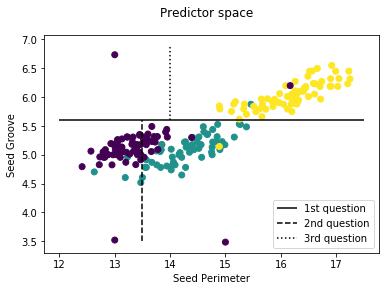

In [18]:
fig, ax = plt.subplots()
ax.scatter(wheatSimpler.perimeter, wheatSimpler.groove, c = labels)

ax.hlines(y=5.6, xmin=12, xmax=17.5, linestyle='-', label="1st question")
ax.vlines(x=13.5, ymin=3.5, ymax=5.6, linestyle='--', label="2nd question")
ax.vlines(x=14, ymin=5.6, ymax=6.9, linestyle=':', label="3rd question")

ax.legend(loc='best')
fig.suptitle("Predictor space")
ax.set_xlabel("Seed Perimeter")
ax.set_ylabel("Seed Groove");

You can see that the predictor space has been segmented in a number of simple regions, four to be precise and a wheat type is predicted according to its position in one of the regions.

# Another example: poisonous mushrooms  

Use decision trees to peruse [The Mushroom Data Set](https://archive.ics.uci.edu/ml/datasets/mushroom), drawn from the Audubon Society Field Guide to North American Mushrooms (1981). The data set details mushrooms described in terms of many physical characteristics, such as cap size  and stalk length, along with a classification of poisonous or edible.  
You can find the dataset in the above UCI link or in the Dataset folder here in github.  

As a standard disclaimer, if you eat a random mushroom you find, you are doing so at your own risk.

## Read the data

In [20]:
# 
# Load up the mushroom dataset into dataframe 'X'
# Header information is on the dataset's website at the UCI ML Repo
#
colNames=['label', 'cap-shape','cap-surface','cap-color','bruises','odor',
          'gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape',
          'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
          'stalk-color-above-ring','stalk-color-below-ring','veil-type',
          'veil-color','ring-number','ring-type','spore-print-color','population',
          'habitat']
X = pd.read_csv("../datasets/agaricus-lepiota.data", header=None, na_values='?',
                names=colNames) 

In [21]:
X.head()

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [22]:
X.describe()

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Pre-process the data
### remove missing data

In [23]:
# 
# drop any row with a nan
#
X.dropna(axis=0, inplace=True) 
print (X.shape)

(5644, 23)


### separate label

In [24]:
#
# : Copy the labels out of the dset into variable 'y' then Remove
# them from X. 

y = X[X.columns[0]].copy()
X.drop(X.columns[0], axis=1,inplace=True)

### Encode the dataset using dummies

In [25]:
#
# Encode labels poisonous / edible
y = y.map({'p':0, 'e':1})

# Encode the rest 
#
X = pd.get_dummies(X)

### Split the data inot test and training sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=7)

## Train the model

In [27]:
#
# Create a DT classifier. No need to set any parameters, let;s get the ful depth
#

model = tree.DecisionTreeClassifier()

In [28]:
#
# train the classifier on the training data / labels:
#
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(193.15384615384616, 199.32, 'spore-print-color_h <= 0.5\nentropy = 0.469\nsamples = 3950\nvalue = [1487, 2463]'),
 Text(167.4, 163.07999999999998, 'gill-size_n <= 0.5\nentropy = 0.235\nsamples = 2851\nvalue = [388, 2463]'),
 Text(103.01538461538462, 126.83999999999999, 'ring-number_o <= 0.5\nentropy = 0.064\nsamples = 2372\nvalue = [78, 2294]'),
 Text(77.26153846153846, 90.6, 'habitat_p <= 0.5\nentropy = 0.401\nsamples = 108\nvalue = [78, 30]'),
 Text(51.50769230769231, 54.359999999999985, 'stalk-color-above-ring_n <= 0.5\nentropy = 0.093\nsamples = 82\nvalue = [78, 4]'),
 Text(25.753846153846155, 18.119999999999976, 'entropy = 0.0\nsamples = 78\nvalue = [78, 0]'),
 Text(77.26153846153846, 18.119999999999976, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(103.01538461538462, 54.359999999999985, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(128.76923076923077, 90.6, 'entropy = 0.0\nsamples = 2264\nvalue = [0, 2264]'),
 Text(231.7846153846154, 126.83999999999999, 'od

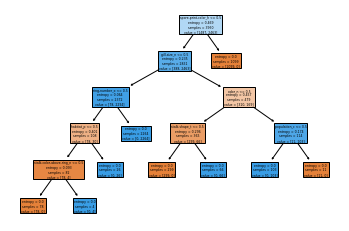

In [29]:
tree.plot_tree(model, feature_names=X_train.columns, filled=True)

RESULT:
top two features you should consider when deciding if a mushroom is eadible or not:
**Odor** and **Gill Size**.

In [30]:
# score the classifier on the testing data / labels:
# Returns the mean accuracy on the given test data and labels.

score = model.score(X_test, y_test)

print ("High-Dimensionality Score: ", round((score*100), 3))

High-Dimensionality Score:  100.0
